# 1. 필요한 package 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
from collections import Counter

# 2. run하기
---
내가 원하는 동작들
- json file을 순차적으로 불러와서
- num_followers, num_tracks, num_albums, collabroative 에 대한 통계를 작성하고 시각화함

### 변수 선언

In [2]:
list_n_tracks = []
list_n_albums = []
list_n_followers = []
list_collabo = []

dict_track = {}
dict_album = {}
dict_follower = {}
dict_collabo = {}

### RUN
- 6-7 분정도 걸림

In [25]:
data_dir = './data/spotify_million_playlist/data'
json_list = os.listdir(data_dir)

for i,json_file in enumerate(tqdm(json_list,desc='Now on running...')):
    with open(data_dir +'/'+json_file, 'r') as f:
        json_data = json.load(f)['playlists']
    for playlist in range(len(json_data)):
        info = json_data[playlist]
        list_n_tracks.append(info['num_tracks'])
        list_n_albums.append(info['num_albums'])
        list_n_followers.append(info['num_followers'])
        list_collabo.append(info['collaborative'])
    dict_track = Counter(dict_track) + Counter(list_n_tracks)
    dict_album = Counter(dict_album) + Counter(list_n_albums)
    dict_follower = Counter(dict_follower) + Counter(list_n_followers)
    dict_collabo = Counter(dict_collabo) + Counter(list_collabo)
    list_n_tracks = []
    list_n_albums = []
    list_n_followers = []
    list_collabo = []
    

Now on running...: 100%|██████████| 1000/1000 [06:04<00:00,  2.75it/s]


# 3. 시각화

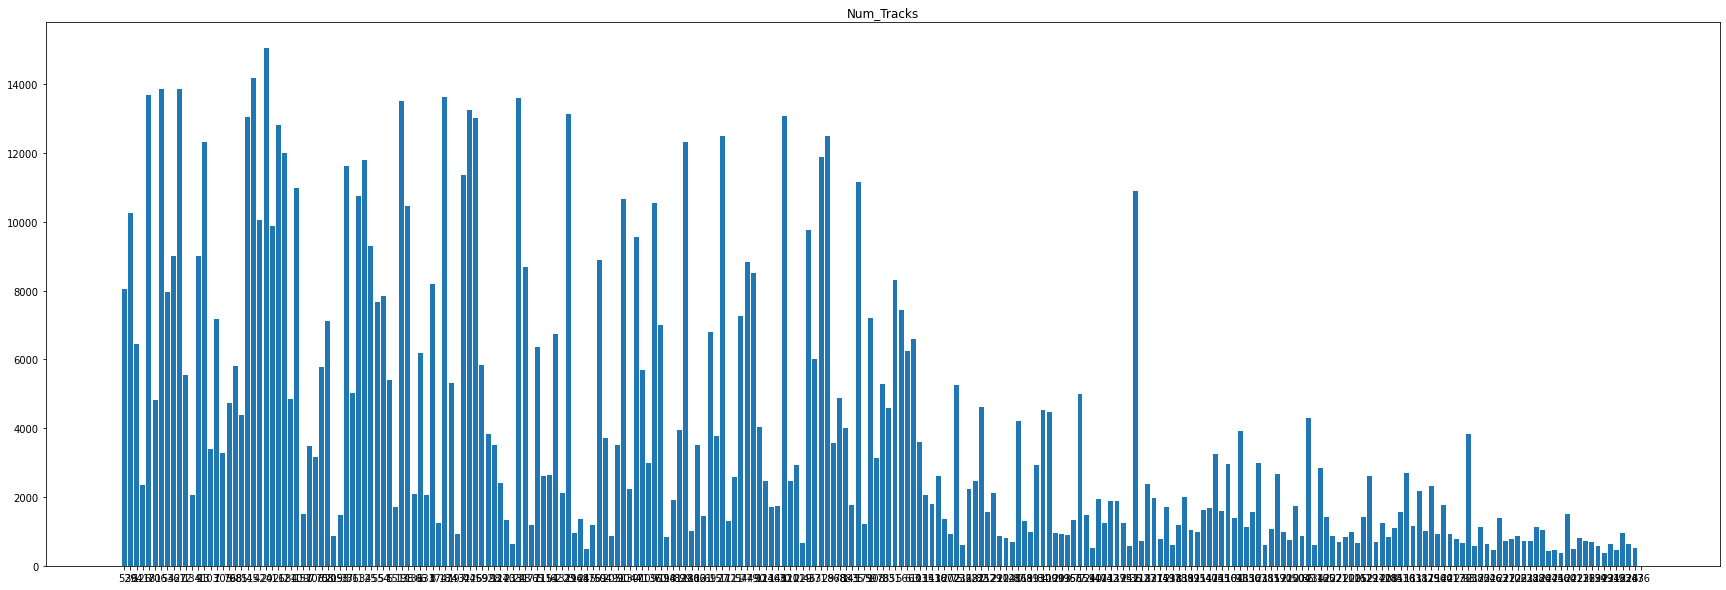

In [33]:
plt.figure(figsize=(30,10))
plt.bar(range(len(dict(dict_track))), list(dict(dict_track).values()), align='center')
plt.xticks(range(len(dict(dict_track))), list(dict(dict_track).keys()))
plt.title('Num_Tracks')
plt.show()

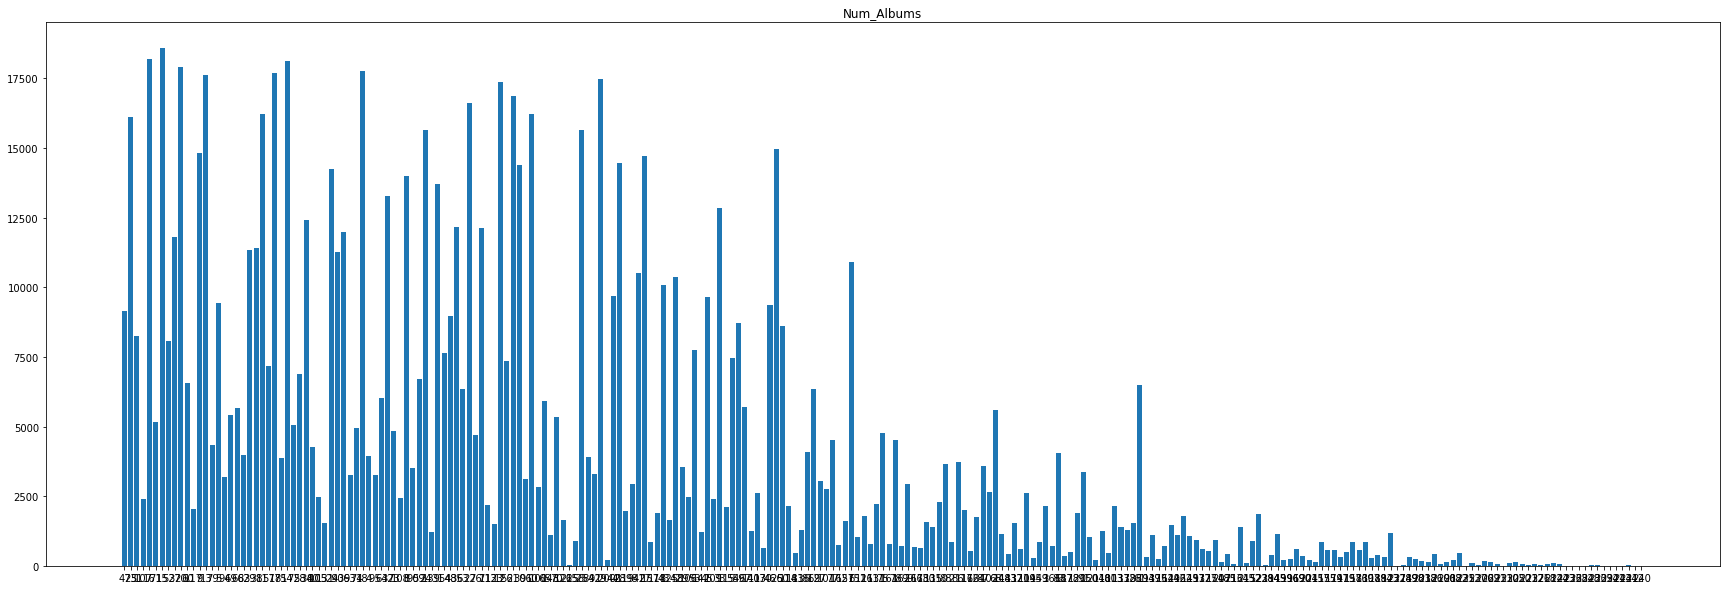

In [34]:
plt.figure(figsize=(30,10))
plt.bar(range(len(dict(dict_album))), list(dict(dict_album).values()), align='center')
plt.xticks(range(len(dict(dict_album))), list(dict(dict_album).keys()))
plt.title('Num_Albums')
plt.show()

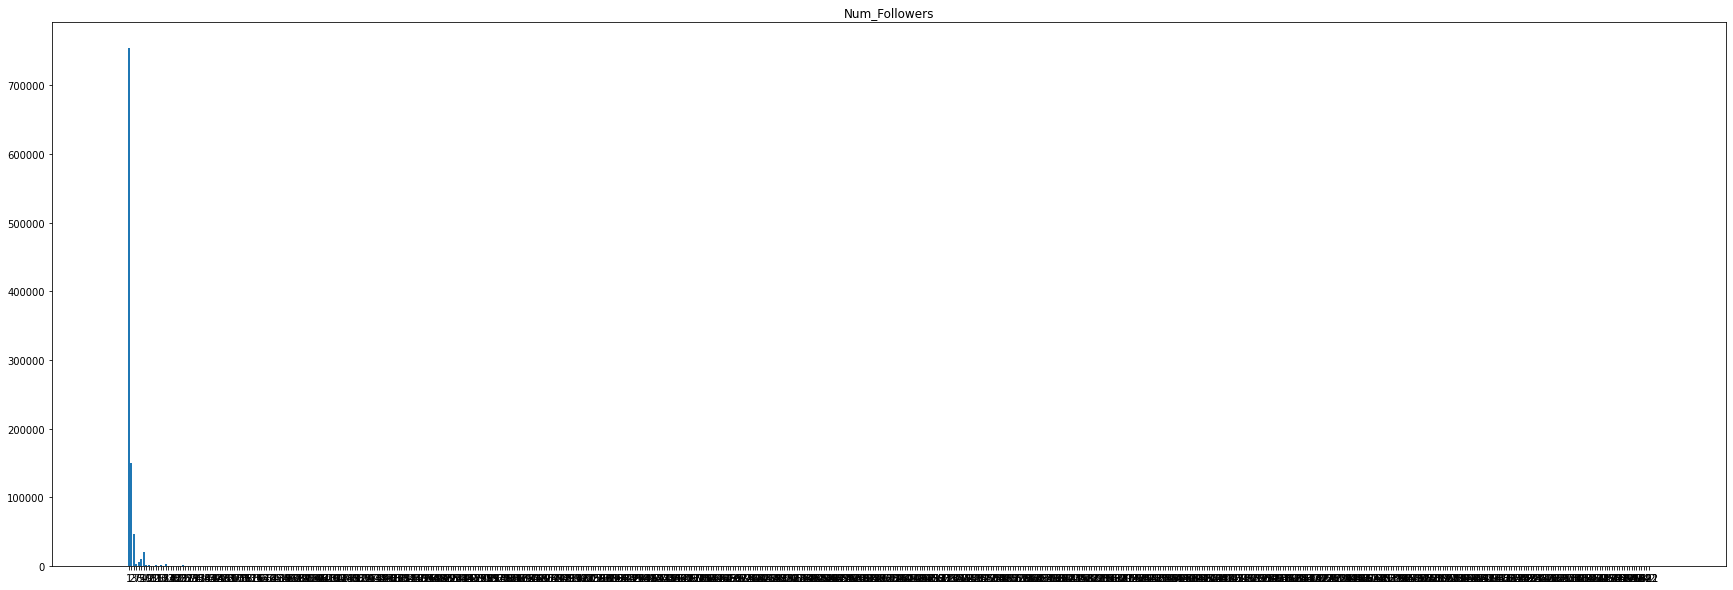

In [35]:
plt.figure(figsize=(30,10))
plt.bar(range(len(dict(dict_follower))), list(dict(dict_follower).values()), align='center')
plt.xticks(range(len(dict(dict_follower))), list(dict(dict_follower).keys()))
plt.title('Num_Followers')
plt.show()

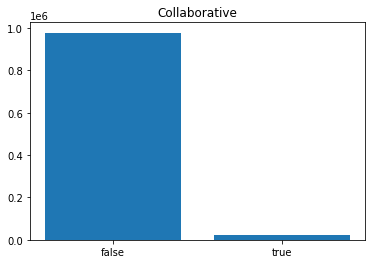

In [30]:
plt.bar(range(len(dict(dict_collabo))), list(dict(dict_collabo).values()), align='center')
plt.xticks(range(len(dict(dict_collabo))), list(dict(dict_collabo).keys()))
plt.title('Collaborative')
plt.show()

In [41]:
dict(dict_collabo)

{'false': 977431, 'true': 22569}

### Save

In [40]:
dir = './data/spotify_million_playlist'
os.chdir(dir)

with open('track.json', 'w') as fp:
    json.dump(dict(dict_track), fp)

with open('album.json', 'w') as fp:
    json.dump(dict(dict_album), fp)

with open('follower.json', 'w') as fp:
    json.dump(dict(dict_follower), fp)

with open('collaborative.json', 'w') as fp:
    json.dump(dict(dict_collabo), fp)

# 4. 정량분석

In [8]:
# 불러오기
import json

path = './data/spotify_million_playlist/'

with open(path+'track.json', 'r') as f:
    dict_track = json.load(f)
with open(path+'album.json', 'r') as f:
    dict_album = json.load(f)
with open(path+'follower.json', 'r') as f:
    dict_follower = json.load(f)
with open(path+'collaborative.json', 'r') as f:
    dict_collabo = json.load(f)

In [9]:
dict_follower = {int(k):int(v) for k,v in dict_follower.items()} # key를 정수형으로
dict_follower = dict(sorted(dict_follower.items())) # key(follower의 수)를 기준으로 정렬

In [10]:
sum(list(dict_follower.values())[100:]) # 100명 이상의 follower를 가진 playlist의 수

816

In [18]:
list(dict_follower.keys())[-100:][0]

1980

In [27]:
dict_follower.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 202, 203, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 224, 225, 227, 229, 230, 232, 234, 235, 236, 238, 23

# 5. 적절한 Playlist 뽑기
## 5.1 100명 이상의 follower를 가진 playlist가 얼마의 track을 가지는가?
- 100만개의 playlist를 돌며
- 100명 이상의 follower가 있는 track은 몇 개의 track을 가지는지
- df에 playlist | follower | track 순으로 저장한다


In [43]:
playlist = []
follower = []
track = []

In [ ]:
# 이 코드는 공유하는 사람이 많은 플레이리스트를 추립니다
# top_n : 가장 많은 순으로 몇개의 playlist를 쓸거냐 

top_n = 100
cut_line = 1612 #list(dict_follower.keys())[-top_n:][0]
count = 0
data_dir = './data/spotify_million_playlist/data'
json_list = os.listdir(data_dir)

for i,json_file in enumerate(tqdm(json_list,desc='Now on running...')):
    with open(data_dir +'/'+json_file, 'r') as f:
        json_data = json.load(f)['playlists']
    for playlist_ in range(len(json_data)):
        info = json_data[playlist_]
        num_followers = info['num_followers']
        if num_followers >= cut_line:
            if int(info['num_tracks'])<20:
                continue
            playlist.append(info['pid'])
            follower.append(num_followers)
            track.append(info['num_tracks'])
            count += 1
            if count == 100:
                break

playlist_dic = {'playlist':playlist,
                'follower':follower,
                'track':track
                }
df = pd.DataFrame(playlist_dic)
df = df.drop_duplicates(['playlist'])
df.to_csv('./data/spotify_million_playlist/follower상위'+str(top_n)+'.csv', encoding='', index=False)

In [52]:
# df = pd.read_csv('./data/spotify_million_playlist/follower상위'+str(top_n)+'.csv')

num_tracks = df['track'].values
num_tracks[num_tracks<20] # 없어야한다

array([], dtype=int64)

In [53]:
print(f'평균 : {num_tracks.mean()}')
print(f'중앙값 : {np.median(num_tracks)}')
print(f'최소: {np.min(num_tracks)}')
print(f'최대 : {np.max(num_tracks)}')
print(f'분산 : {np.var(num_tracks)}')
print(f'표준편차 : {np.std(num_tracks)}')
print(f'25quantile : {np.quantile(num_tracks,0.25)}')
print(f'75quantile : {np.quantile(num_tracks,0.75)}')


평균 : 95.52586206896552
중앙값 : 79.0
최소: 20
최대 : 242
분산 : 3977.990710463734
표준편차 : 63.07131448181284
25quantile : 47.0
75quantile : 127.0


In [34]:
# 25에서 75 quantile 사이에 있는 track의 수
len(num_tracks) - len(num_tracks[num_tracks<30]) - len(num_tracks[num_tracks>126])

85

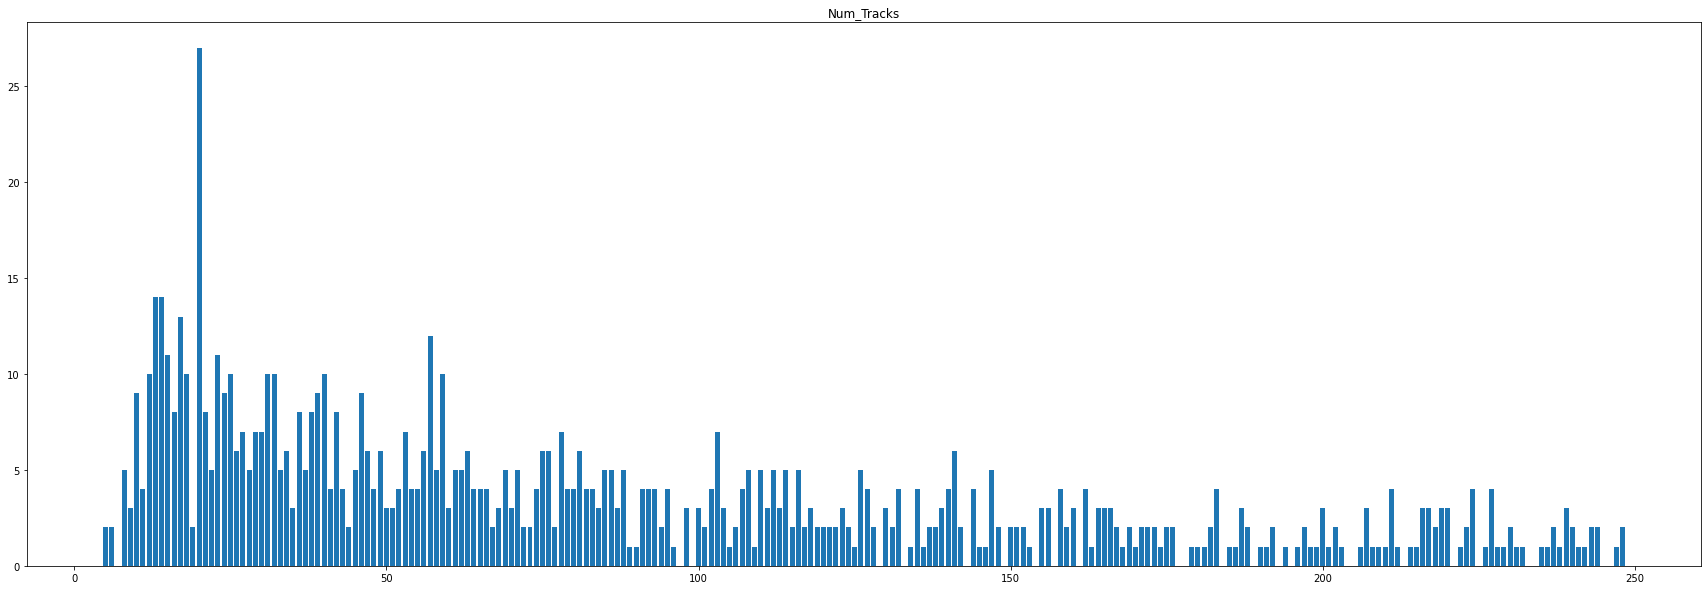

In [91]:
plt.figure(figsize=(30,10))
# plt.bar(range(len(num_tracks)), list(num_tracks), align='center')
plt.bar(Counter(num_tracks).keys(), Counter(num_tracks).values(),align='center')
plt.title('Num_Tracks')
plt.show()

## 5.2 Youtube 링크 추출위한 준비
- df를 만든다
- df는 pid | artist_name | track_name | url 으로 구성된다
- follower가 100이 넘고 track의 수가 25-75 quantile안에 드는 playlist만 추가한다

In [62]:
df = pd.read_csv('./data/spotify_million_playlist/follower상위100.csv')

data_dir = './data/spotify_million_playlist/data/'

title = 'mpd.slice.'
df_url = pd.DataFrame(data={'pid':[],
                            'artist_name':[],
                            'track_name':[],
                            'url':[]})
for idx,item in tqdm(df.iterrows()):
    pid, _, track = item
    file_num = int((pid//1000)*1000)
    target = data_dir+title+str(file_num)+'-'+str(file_num+999)+'.json'
    with open(target, 'r') as f:
        json_data = json.load(f)['playlists']
    for playlist in range(len(json_data)):
        info = json_data[playlist]
        if info['pid'] == pid:
            for i in range(20):#(len(info['tracks'])):
                track = info['tracks'][i]
                df_url = df_url.append({'pid' : int(pid) , 
                                        'artist_name' : track['artist_name'], 
                                        'track_name' : track['track_name']} , ignore_index=True)

df_url.to_csv('./data/spotify_million_playlist/url.csv',index=False)

100it [00:24,  4.14it/s]


# 6. 기타 : 학습 Loss 출력
- 보고서와 ppt에 들어갈 내용
## 6.1 Pedalboard

In [1]:
import matplotlib.pyplot as plt

In [2]:
resnet50 = open('./exp_resnet50_pedalboard_adam_small/train_loss.log')
resnet101 = open('./exp_resnet101_pedalboard_adam_small/train_loss.log')
resnet152 = open('./exp_resnet152_pedalboard_adam_small/train_loss.log')
transformer = open('./exp_transformer_pedalboard_adam_small/train_loss.log')
lines_resnet50 = resnet50.readlines()
lines_resnet101 = resnet101.readlines()
lines_resnet152 = resnet152.readlines()
lines_transformer = transformer.readlines()
l1,l2,l3,l4 = [],[],[],[]
for line in lines_resnet50:
    l1.append(float(line.split(' ')[1]))
for line in lines_resnet101:
    l2.append(float(line.split(' ')[1]))
for line in lines_resnet152:
    l3.append(float(line.split(' ')[1]))
for line in lines_transformer:
    l4.append(float(line.split(' ')[1]))

Text(0, 0.5, 'Loss')

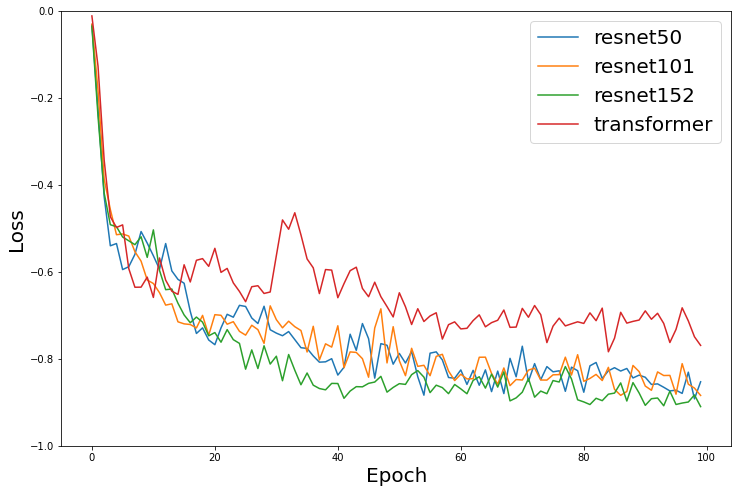

In [5]:
plt.figure(figsize=(12,8))
plt.plot(l1,label='resnet50')
plt.plot(l2,label='resnet101')
plt.plot(l3,label='resnet152')
plt.plot(l4,label='transformer')
plt.legend(fontsize=20)
# plt.title('Loss Curve',fontsize=20)
plt.ylim((-1,0))
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)

## 6.2 Random Mix

In [6]:
resnet50 = open('./exp_resnet50_randommix_adam_small/train_loss.log')
resnet101 = open('./exp_resnet101_randommix_adam_small/train_loss.log')
resnet152 = open('./exp_resnet152_randommix_adam_small/train_loss.log')
transformer = open('./exp_transformer_randommix_adam_small/train_loss.log')
lines_resnet50 = resnet50.readlines()
lines_resnet101 = resnet101.readlines()
lines_resnet152 = resnet152.readlines()
lines_transformer = transformer.readlines()
l1,l2,l3,l4 = [],[],[],[]
for line in lines_resnet50:
    l1.append(float(line.split(' ')[1]))
for line in lines_resnet101:
    l2.append(float(line.split(' ')[1]))
for line in lines_resnet152:
    l3.append(float(line.split(' ')[1]))
for line in lines_transformer:
    l4.append(float(line.split(' ')[1]))

Text(0, 0.5, 'Loss')

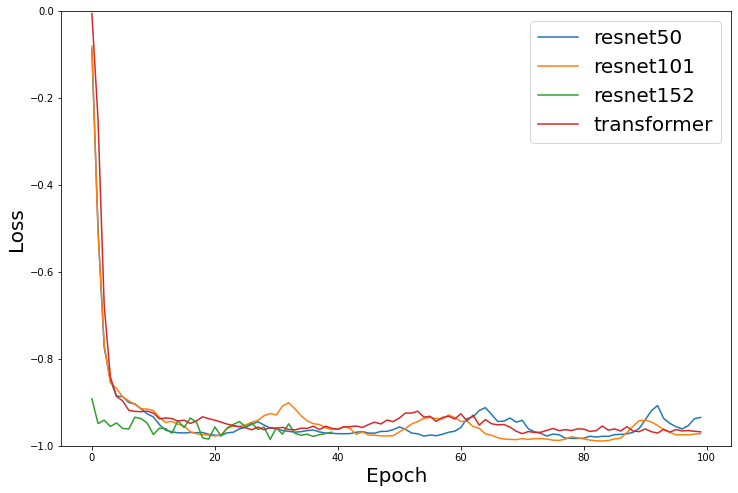

In [7]:
plt.figure(figsize=(12,8))
plt.plot(l1,label='resnet50')
plt.plot(l2,label='resnet101')
plt.plot(l3,label='resnet152')
plt.plot(l4,label='transformer')
plt.legend(fontsize=20)
# plt.title('Loss Curve',fontsize=20)
plt.ylim((-1,0))
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)

## 6.3 Image Aug

In [48]:
resnet50 = open('./exp_resnet50_image_adam_small/train_loss.log')
# resnet101 = open('./exp_resnet101_randommix_adam_small/train_loss.log')
resnet152 = open('./exp_resnet152_image_adam_small/train_loss.log')
lines_resnet50 = resnet50.readlines()
# lines_resnet101 = resnet101.readlines()
lines_resnet152 = resnet152.readlines()

l1,l2,l3 = [],[],[]
for line in lines_resnet50:
    l1.append(float(line.split(' ')[1]))
# for line in lines_resnet101:
#     l2.append(float(line.split(' ')[1]))
for line in lines_resnet152:
    l3.append(float(line.split(' ')[1]))

Text(0, 0.5, 'Loss')

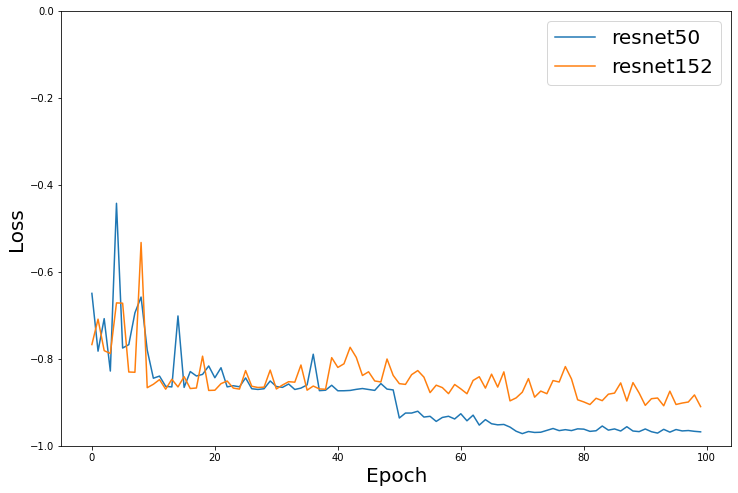

In [49]:
plt.figure(figsize=(12,8))
plt.plot(l1,label='resnet50')
# plt.plot(l2,label='resnet101')
plt.plot(l3,label='resnet152')
plt.legend(fontsize=20)
# plt.title('Loss',fontsize=20)
plt.ylim((-1,0))
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)

## 6.4 MTA Pretrain한거
### 6.4.1 PedalBaord

In [65]:
path = 'D:/Siamusic/exp_MTA_MTA/MTA_'
resnet50 = open(path+'resnet50_pedalboard.log')
resnet101 = open(path+'resnet101_pedalboard.log')
resnet152 = open(path+'resnet152_pedalboard.log')
transformer = open(path+'transformer_pedalboard.log')
lines_resnet50 = resnet50.readlines()
lines_resnet101 = resnet101.readlines()
lines_resnet152 = resnet152.readlines()
lines_transformer = transformer.readlines()

l1,l2,l3,l4 = [],[],[],[]
for line in lines_resnet50:
    l1.append(float(line.split(' ')[1]))
for line in lines_resnet101:
    l2.append(float(line.split(' ')[1]))
for line in lines_resnet152:
    l3.append(float(line.split(' ')[1]))
for line in lines_transformer:
    l4.append(float(line.split(' ')[1]))

Text(0, 0.5, 'Loss')

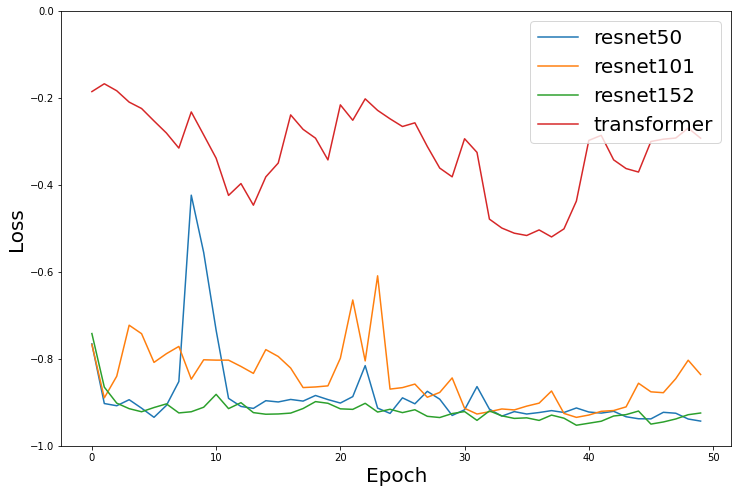

In [68]:
plt.figure(figsize=(12,8))
plt.plot(l1[0:50],label='resnet50')
plt.plot(l2[:50],label='resnet101')
plt.plot(l3[:50],label='resnet152')
plt.plot(l4[:50],label='transformer')
plt.legend(fontsize=20,loc=1)
# plt.title('Loss Curve',fontsize=20)
plt.ylim((-1,0))
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)

### 6.4.2 Random Mix

In [63]:
path = 'D:/Siamusic/exp_MTA_MTA/MTA_'
resnet50 = open(path+'resnet50_randommix.log')
resnet101 = open(path+'resnet101_randommix.log')
resnet152 = open(path+'resnet152_randommix.log')
transformer = open(path+'transformer_randommix.log')
lines_resnet50 = resnet50.readlines()
lines_resnet101 = resnet101.readlines()
lines_resnet152 = resnet152.readlines()
lines_transformer = transformer.readlines()

l1,l2,l3,l4 = [],[],[],[]
for line in lines_resnet50:
    l1.append(float(line.split(' ')[1]))
for line in lines_resnet101:
    l2.append(float(line.split(' ')[1]))
for line in lines_resnet152:
    l3.append(float(line.split(' ')[1]))
for line in lines_transformer:
    l4.append(float(line.split(' ')[1]))

Text(0, 0.5, 'Loss')

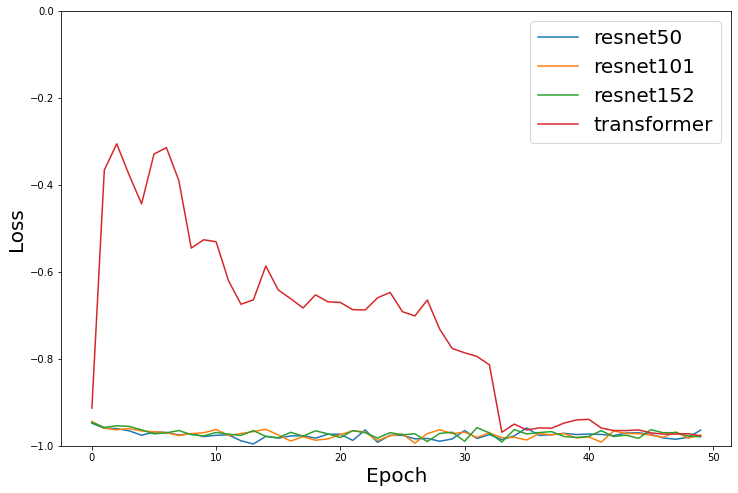

In [64]:
plt.figure(figsize=(12,8))
plt.plot(l1,label='resnet50')
plt.plot(l2,label='resnet101')
plt.plot(l3,label='resnet152')
plt.plot(l4,label='transformer')
plt.legend(fontsize=20)
# plt.title('Loss Curve',fontsize=20)
plt.ylim((-1,0))
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)